### Business Problem:
A FMCG company has entered into the instant noodles business two years back. Their higher management has notices that there is a miss match in the demand and supply. Where the demand is high, supply is pretty low and where the demand is low, supply is pretty high. In both the ways it is an inventory cost loss to the company; hence, the higher management wants to optimize the supply quantity in each and every warehouse in entire country.

Goal & Objective: The objective of this exercise is to build a model, using historical data that will determine an optimum weight of the product to be shipped each time to the warehouse.

Also try to analysis the demand pattern in different pockets of the country so management can drive the advertisement campaign particular in those pockets.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.style
from warnings import filterwarnings
filterwarnings("ignore")

#### Read the data

In [2]:
df = pd.read_csv('Data.csv')
pd.options.display.max_columns = None
df.head()

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,4651,Rented,24,0,1,1,91,29.0,NaN,13,0,A,5,15,17115
1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,6217,Company Owned,47,0,0,1,210,31.0,NaN,4,0,A,3,17,5074
2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,4306,Company Owned,64,0,0,0,161,37.0,NaN,17,0,A,6,22,23137
3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,6000,Rented,50,0,0,0,103,21.0,NaN,17,1,A+,3,27,22115
4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,4740,Company Owned,42,1,0,1,112,25.0,2009.0,18,0,C,6,24,24071


#### Visual inspection of data: Check the number of rows and columns

In [3]:
df.shape

(25000, 24)

#### Column names

In [4]:
df.columns

Index(['Ware_house_ID', 'WH_Manager_ID', 'Location_type', 'WH_capacity_size',
       'zone', 'WH_regional_zone', 'num_refill_req_l3m', 'transport_issue_l1y',
       'Competitor_in_mkt', 'retail_shop_num', 'wh_owner_type',
       'distributor_num', 'flood_impacted', 'flood_proof', 'electric_supply',
       'dist_from_hub', 'workers_num', 'wh_est_year',
       'storage_issue_reported_l3m', 'temp_reg_mach',
       'approved_wh_govt_certificate', 'wh_breakdown_l3m', 'govt_check_l3m',
       'product_wg_ton'],
      dtype='object')

#### Descriptive details

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
num_refill_req_l3m,25000.0,4.089040,2.606612,0.0,2.0,4.0,6.0,8.0
transport_issue_l1y,25000.0,0.773680,1.199449,0.0,0.0,0.0,1.0,5.0
Competitor_in_mkt,25000.0,3.104200,1.141663,0.0,2.0,3.0,4.0,12.0
retail_shop_num,25000.0,4985.711560,1052.825252,1821.0,4313.0,4859.0,5500.0,11008.0
distributor_num,25000.0,42.418120,16.064329,15.0,29.0,42.0,56.0,70.0
flood_impacted,25000.0,0.098160,0.297537,0.0,0.0,0.0,0.0,1.0
flood_proof,25000.0,0.054640,0.227281,0.0,0.0,0.0,0.0,1.0
electric_supply,25000.0,0.656880,0.474761,0.0,0.0,1.0,1.0,1.0
dist_from_hub,25000.0,163.537320,62.718609,55.0,109.0,164.0,218.0,271.0
workers_num,24010.0,28.944398,7.872534,10.0,24.0,28.0,33.0,98.0


#### Understanding of attributes

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ware_house_ID                 25000 non-null  object 
 1   WH_Manager_ID                 25000 non-null  object 
 2   Location_type                 25000 non-null  object 
 3   WH_capacity_size              25000 non-null  object 
 4   zone                          25000 non-null  object 
 5   WH_regional_zone              25000 non-null  object 
 6   num_refill_req_l3m            25000 non-null  int64  
 7   transport_issue_l1y           25000 non-null  int64  
 8   Competitor_in_mkt             25000 non-null  int64  
 9   retail_shop_num               25000 non-null  int64  
 10  wh_owner_type                 25000 non-null  object 
 11  distributor_num               25000 non-null  int64  
 12  flood_impacted                25000 non-null  int64  
 13  f

#### Getting the unique values of categorical variables

In [7]:
df['Location_type'].value_counts()

Rural    22957
Urban     2043
Name: Location_type, dtype: int64

In [8]:
df['WH_capacity_size'].value_counts()

Large    10169
Mid      10020
Small     4811
Name: WH_capacity_size, dtype: int64

In [9]:
df['zone'].value_counts()

North    10278
West      7931
South     6362
East       429
Name: zone, dtype: int64

In [10]:
df['WH_regional_zone'].value_counts()

Zone 6    8339
Zone 5    4587
Zone 4    4176
Zone 2    2963
Zone 3    2881
Zone 1    2054
Name: WH_regional_zone, dtype: int64

In [11]:
df['wh_owner_type'].value_counts()

Company Owned    13578
Rented           11422
Name: wh_owner_type, dtype: int64

In [12]:
df['approved_wh_govt_certificate'].value_counts()

C     5501
B+    4917
B     4812
A     4671
A+    4191
Name: approved_wh_govt_certificate, dtype: int64

In [13]:
df['transport_issue_l1y'].value_counts()

0    15215
1     4644
2     2198
3     1818
4      777
5      348
Name: transport_issue_l1y, dtype: int64

In [14]:
df['wh_breakdown_l3m'].value_counts()

2    5076
3    5006
4    4037
6    4012
5    3925
1    2036
0     908
Name: wh_breakdown_l3m, dtype: int64

### Exploratory data analysis

#### Filling the missing values in the 'wh_est_year' column as 'Unknown'

In [15]:
df.wh_est_year = df.wh_est_year.fillna('Unknown')

In [16]:
df.head()

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,4651,Rented,24,0,1,1,91,29.0,Unknown,13,0,A,5,15,17115
1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,6217,Company Owned,47,0,0,1,210,31.0,Unknown,4,0,A,3,17,5074
2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,4306,Company Owned,64,0,0,0,161,37.0,Unknown,17,0,A,6,22,23137
3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,6000,Rented,50,0,0,0,103,21.0,Unknown,17,1,A+,3,27,22115
4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,4740,Company Owned,42,1,0,1,112,25.0,2009.0,18,0,C,6,24,24071


####  Removal of unwanted variables

Before we move on to the univariate and bivariate analysis, basic steps should be performed to avoid complexities. Hence, we are removing the unwanted variables that are not useful for the analysis and model building.

In [17]:
df=df.drop(['Ware_house_ID','WH_Manager_ID','wh_est_year'], axis=1)

#### Checking duplicates

In [18]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


#### Variable transformation: Converting data types

In [19]:
before = df.dtypes
before

Location_type                    object
WH_capacity_size                 object
zone                             object
WH_regional_zone                 object
num_refill_req_l3m                int64
transport_issue_l1y               int64
Competitor_in_mkt                 int64
retail_shop_num                   int64
wh_owner_type                    object
distributor_num                   int64
flood_impacted                    int64
flood_proof                       int64
electric_supply                   int64
dist_from_hub                     int64
workers_num                     float64
storage_issue_reported_l3m        int64
temp_reg_mach                     int64
approved_wh_govt_certificate     object
wh_breakdown_l3m                  int64
govt_check_l3m                    int64
product_wg_ton                    int64
dtype: object

In [20]:
# converting dtypes using astype
df["Location_type"] = df["Location_type"].astype('category')
df["WH_capacity_size"] = df["WH_capacity_size"].astype('category')
df["zone"] = df["zone"].astype('category')
df["WH_regional_zone"] = df["WH_regional_zone"].astype('category')
df["wh_owner_type"] = df["wh_owner_type"].astype('category')
df["approved_wh_govt_certificate"] = df["approved_wh_govt_certificate"].astype('category')

In [21]:
after = df.dtypes
after

Location_type                   category
WH_capacity_size                category
zone                            category
WH_regional_zone                category
num_refill_req_l3m                 int64
transport_issue_l1y                int64
Competitor_in_mkt                  int64
retail_shop_num                    int64
wh_owner_type                   category
distributor_num                    int64
flood_impacted                     int64
flood_proof                        int64
electric_supply                    int64
dist_from_hub                      int64
workers_num                      float64
storage_issue_reported_l3m         int64
temp_reg_mach                      int64
approved_wh_govt_certificate    category
wh_breakdown_l3m                   int64
govt_check_l3m                     int64
product_wg_ton                     int64
dtype: object

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Location_type                 25000 non-null  category
 1   WH_capacity_size              25000 non-null  category
 2   zone                          25000 non-null  category
 3   WH_regional_zone              25000 non-null  category
 4   num_refill_req_l3m            25000 non-null  int64   
 5   transport_issue_l1y           25000 non-null  int64   
 6   Competitor_in_mkt             25000 non-null  int64   
 7   retail_shop_num               25000 non-null  int64   
 8   wh_owner_type                 25000 non-null  category
 9   distributor_num               25000 non-null  int64   
 10  flood_impacted                25000 non-null  int64   
 11  flood_proof                   25000 non-null  int64   
 12  electric_supply               25000 non-null  

### Univariate Analysis

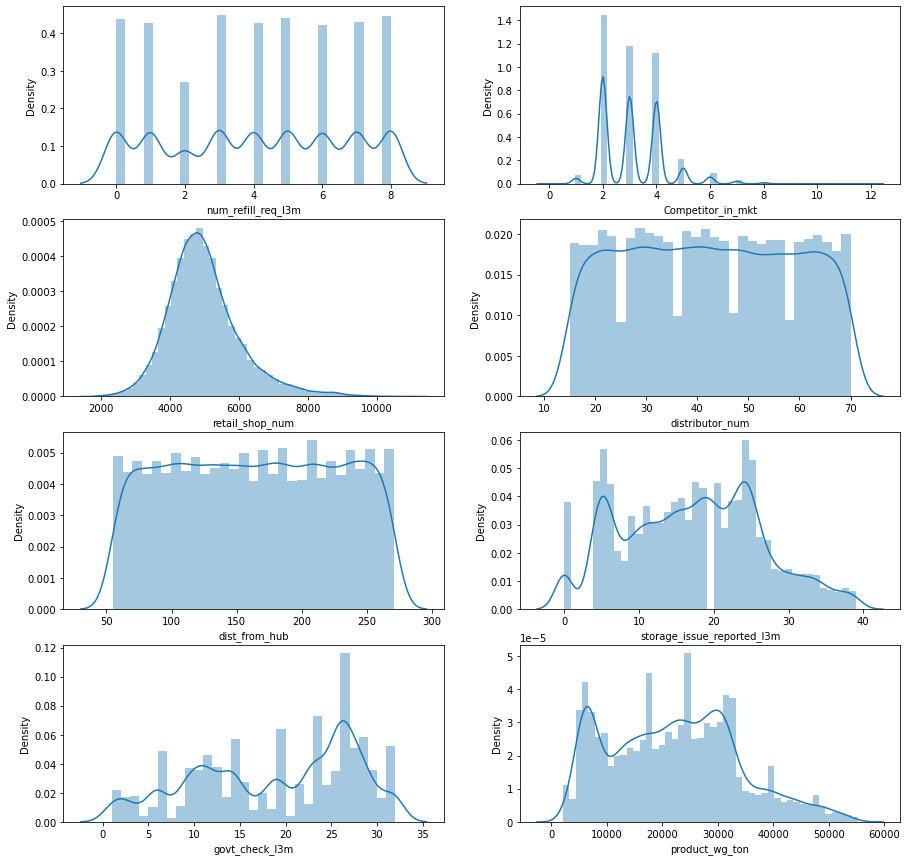

In [23]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(15,15)
sns.distplot(df['num_refill_req_l3m'],kde=True, ax=axes[0][0])
sns.distplot(df['Competitor_in_mkt'] , kde=True, ax=axes[0][1])
sns.distplot(df['retail_shop_num'] , kde=True, ax=axes[1][0])
sns.distplot(df['distributor_num'] , kde=True, ax=axes[1][1])
sns.distplot(df['dist_from_hub'] , kde=True, ax=axes[2][0])
sns.distplot(df['storage_issue_reported_l3m'] , kde=True, ax=axes[2][1])
sns.distplot(df['govt_check_l3m'] , kde=True, ax=axes[3][0])
sns.distplot(df['product_wg_ton'] , kde=True, ax=axes[3][1])
plt.show()

<AxesSubplot:xlabel='workers_num', ylabel='Density'>

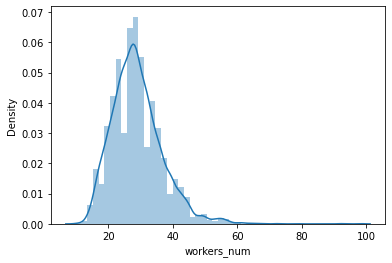

In [24]:
sns.distplot(df['workers_num'] , kde=True)

<AxesSubplot:xlabel='product_wg_ton'>

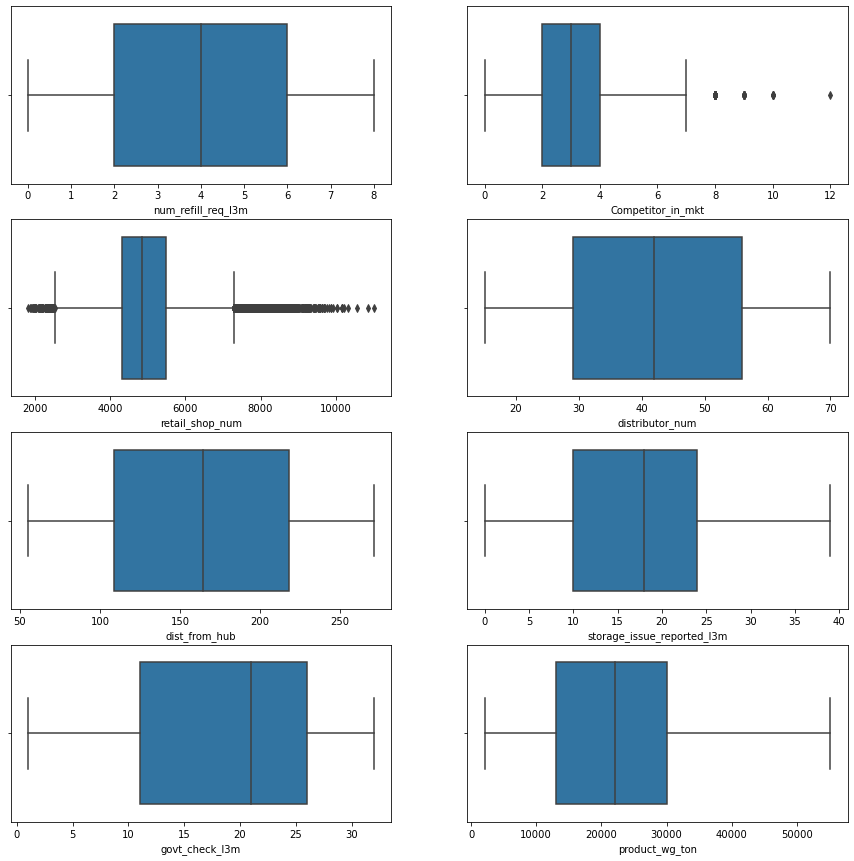

In [25]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(15,15)
sns.boxplot(x='num_refill_req_l3m', data=df, ax=axes[0][0])
sns.boxplot(x='Competitor_in_mkt', data=df, ax=axes[0][1])
sns.boxplot(x='retail_shop_num', data=df, ax=axes[1][0])
sns.boxplot(x='distributor_num', data=df, ax=axes[1][1])
sns.boxplot(x='dist_from_hub', data=df, ax=axes[2][0])
sns.boxplot(x='storage_issue_reported_l3m', data=df, ax=axes[2][1])
sns.boxplot(x='govt_check_l3m', data=df, ax=axes[3][0])
sns.boxplot(x='product_wg_ton', data=df, ax=axes[3][1]) 

<AxesSubplot:xlabel='workers_num'>

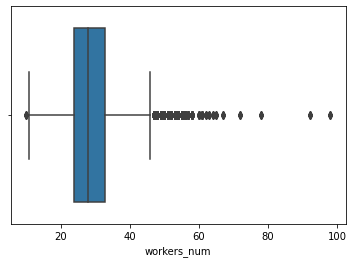

In [26]:
sns.boxplot(x='workers_num', data=df)

<AxesSubplot:xlabel='wh_breakdown_l3m', ylabel='count'>

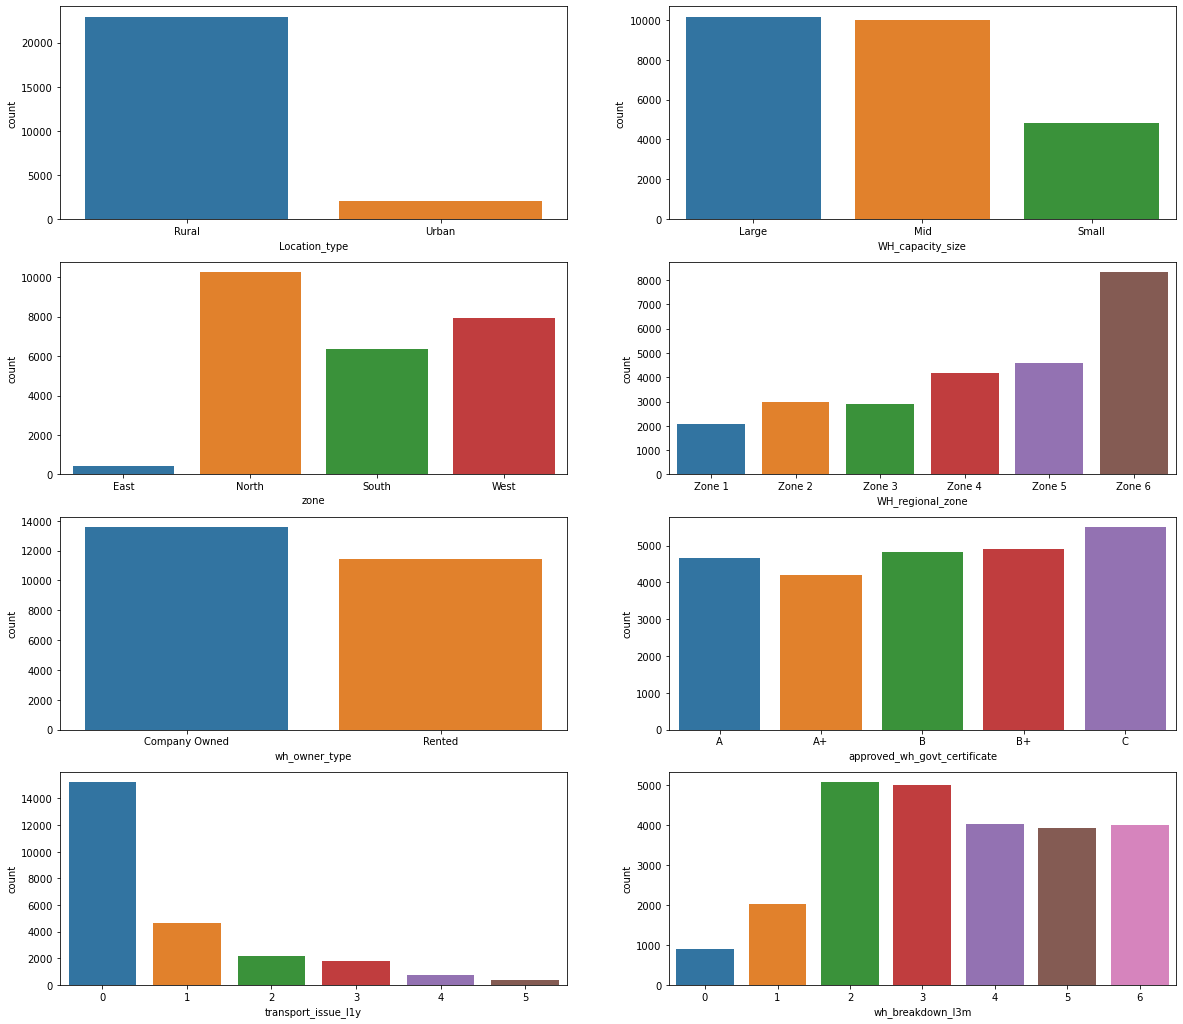

In [27]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(20,18)
sns.countplot(x='Location_type', data=df, ax=axes[0][0])
sns.countplot(x='WH_capacity_size', data=df, ax=axes[0][1])
sns.countplot(x='zone', data=df, ax=axes[1][0])
sns.countplot(x='WH_regional_zone', data=df, ax=axes[1][1])
sns.countplot(x='wh_owner_type', data=df, ax=axes[2][0])
sns.countplot(x='approved_wh_govt_certificate', data=df, ax=axes[2][1])
sns.countplot(x='transport_issue_l1y', data=df, ax=axes[3][0])
sns.countplot(x='wh_breakdown_l3m', data=df, ax=axes[3][1])

### Bivariate analysis

<AxesSubplot:xlabel='storage_issue_reported_l3m', ylabel='product_wg_ton'>

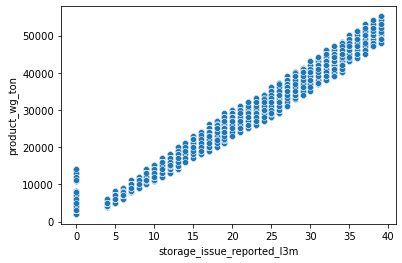

In [28]:
sns.scatterplot(x='storage_issue_reported_l3m', y="product_wg_ton", data=df)

<AxesSubplot:xlabel='workers_num', ylabel='product_wg_ton'>

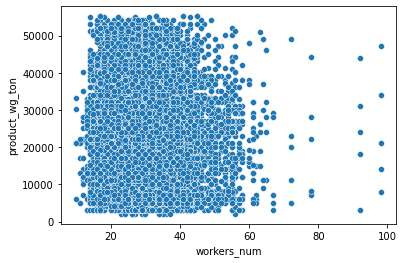

In [29]:
sns.scatterplot(x='workers_num', y="product_wg_ton", data=df)

<AxesSubplot:xlabel='Location_type', ylabel='retail_shop_num'>

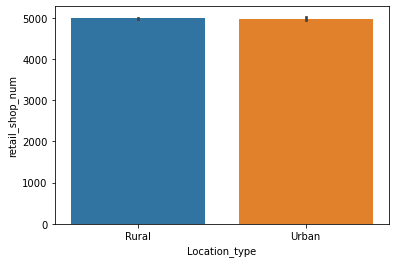

In [30]:
sns.barplot(x='Location_type',y='retail_shop_num', data=df)

<AxesSubplot:xlabel='zone', ylabel='retail_shop_num'>

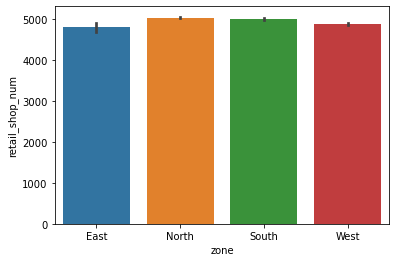

In [31]:
sns.barplot(x='zone',y='retail_shop_num', data=df)

<AxesSubplot:xlabel='zone', ylabel='storage_issue_reported_l3m'>

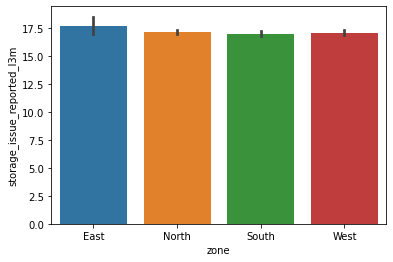

In [32]:
sns.barplot(x='zone',y='storage_issue_reported_l3m', data=df)

<AxesSubplot:xlabel='flood_impacted', ylabel='count'>

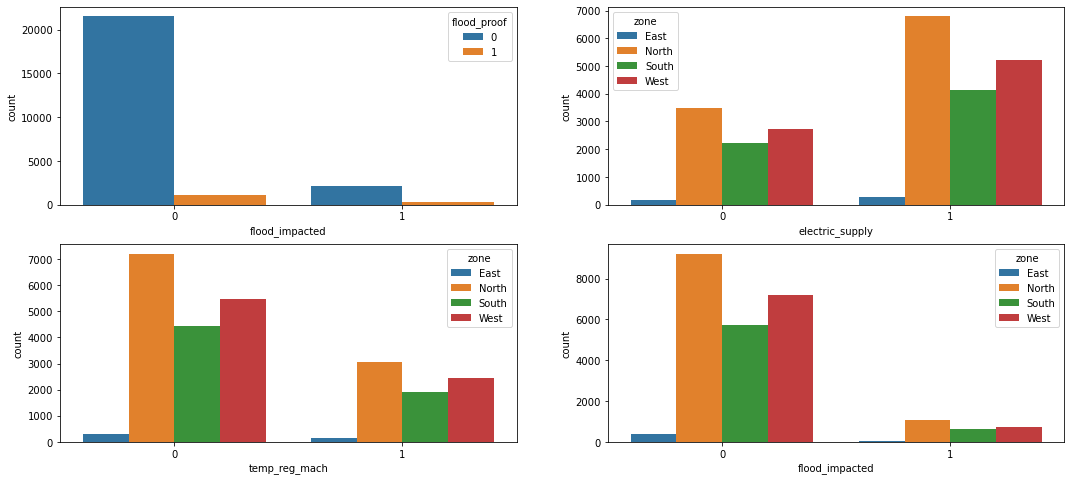

In [33]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(18,8)
sns.countplot(x='flood_impacted',hue='flood_proof', data=df, ax=axes[0][0])
sns.countplot(x='electric_supply',hue='zone', data=df, ax=axes[0][1])
sns.countplot(x='temp_reg_mach',hue='zone', data=df, ax=axes[1][0])
sns.countplot(x='flood_impacted',hue='zone', data=df, ax=axes[1][1])

<AxesSubplot:xlabel='flood_impacted', ylabel='product_wg_ton'>

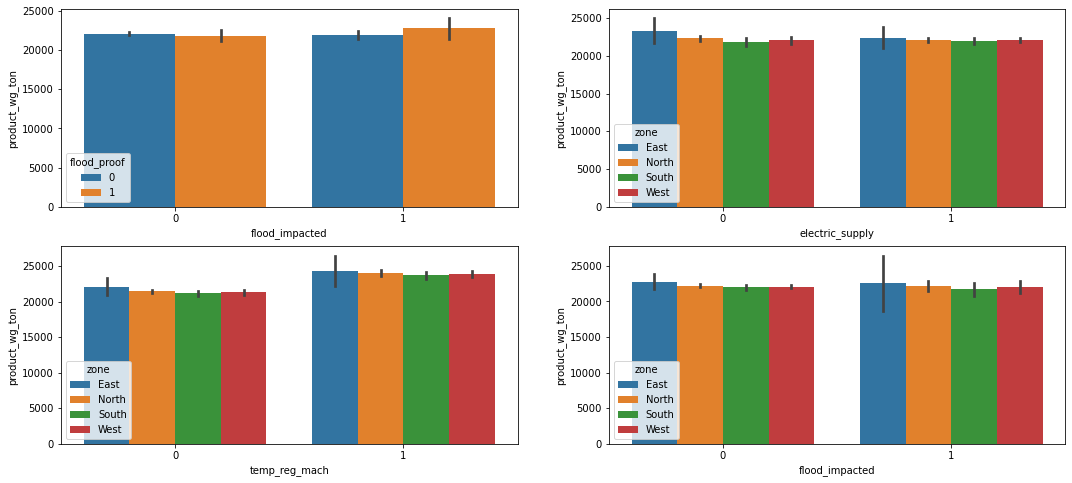

In [34]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(18,8)
sns.barplot(x='flood_impacted',y='product_wg_ton',hue='flood_proof', data=df, ax=axes[0][0])
sns.barplot(x='electric_supply',y='product_wg_ton',hue='zone', data=df, ax=axes[0][1])
sns.barplot(x='temp_reg_mach',y='product_wg_ton',hue='zone', data=df, ax=axes[1][0])
sns.barplot(x='flood_impacted',y='product_wg_ton',hue='zone', data=df, ax=axes[1][1])

<AxesSubplot:xlabel='wh_breakdown_l3m', ylabel='product_wg_ton'>

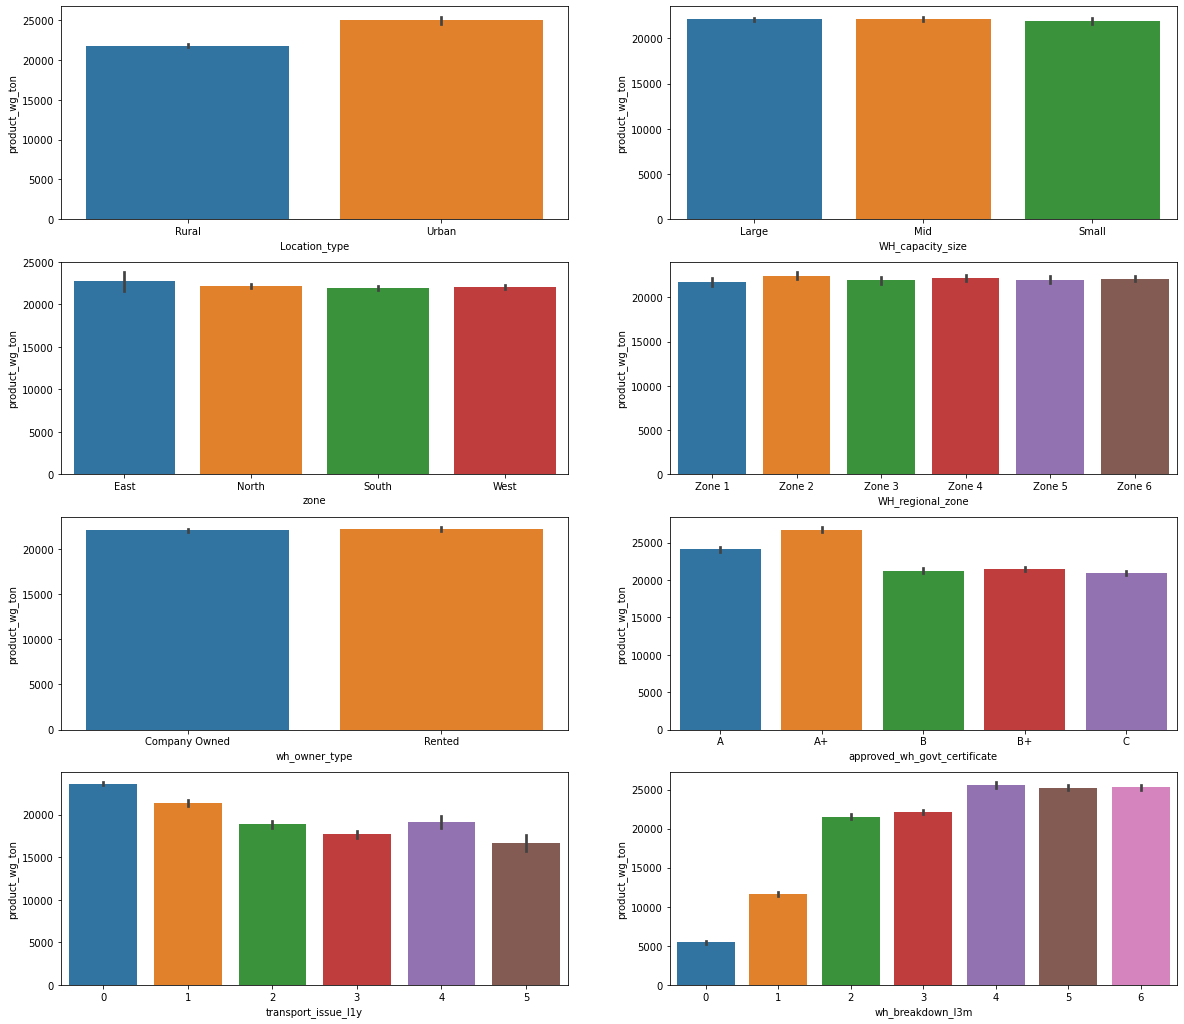

In [35]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(20,18)
sns.barplot(x='Location_type',y='product_wg_ton', data=df, ax=axes[0][0])
sns.barplot(x='WH_capacity_size',y='product_wg_ton', data=df, ax=axes[0][1])
sns.barplot(x='zone',y='product_wg_ton', data=df, ax=axes[1][0])
sns.barplot(x='WH_regional_zone',y='product_wg_ton', data=df, ax=axes[1][1])
sns.barplot(x='wh_owner_type',y='product_wg_ton', data=df, ax=axes[2][0])
sns.barplot(x='approved_wh_govt_certificate',y='product_wg_ton', data=df, ax=axes[2][1])
sns.barplot(x='transport_issue_l1y',y='product_wg_ton', data=df, ax=axes[3][0])
sns.barplot(x='wh_breakdown_l3m',y='product_wg_ton', data=df, ax=axes[3][1])

<AxesSubplot:xlabel='wh_breakdown_l3m', ylabel='product_wg_ton'>

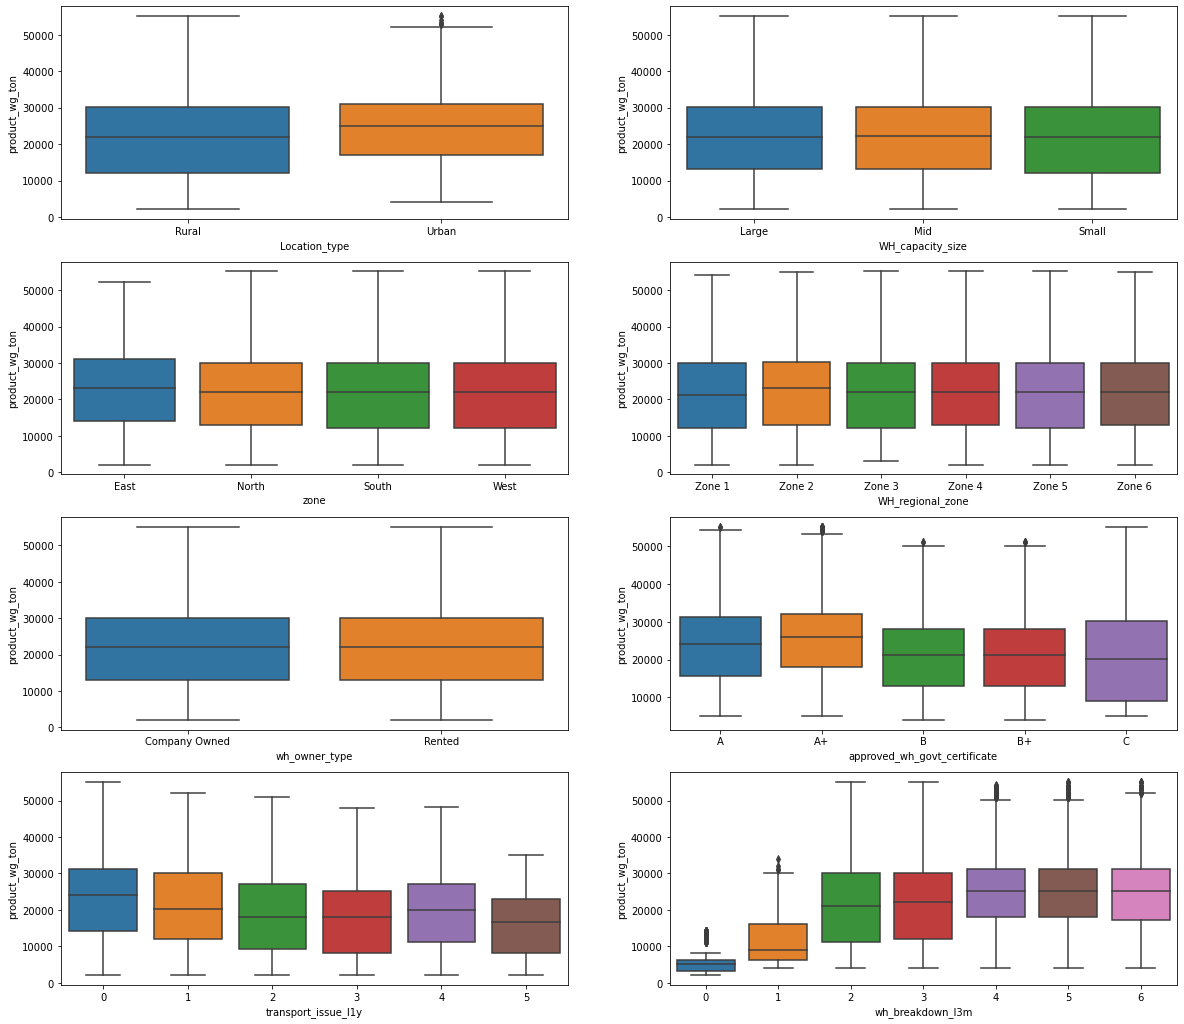

In [36]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(20,18)
sns.boxplot(x='Location_type',y='product_wg_ton', data=df, ax=axes[0][0])
sns.boxplot(x='WH_capacity_size',y='product_wg_ton', data=df, ax=axes[0][1])
sns.boxplot(x='zone',y='product_wg_ton', data=df, ax=axes[1][0])
sns.boxplot(x='WH_regional_zone',y='product_wg_ton', data=df, ax=axes[1][1])
sns.boxplot(x='wh_owner_type',y='product_wg_ton', data=df, ax=axes[2][0])
sns.boxplot(x='approved_wh_govt_certificate',y='product_wg_ton', data=df, ax=axes[2][1])
sns.boxplot(x='transport_issue_l1y',y='product_wg_ton', data=df, ax=axes[3][0])
sns.boxplot(x='wh_breakdown_l3m',y='product_wg_ton', data=df, ax=axes[3][1])

### Multivariate analysis

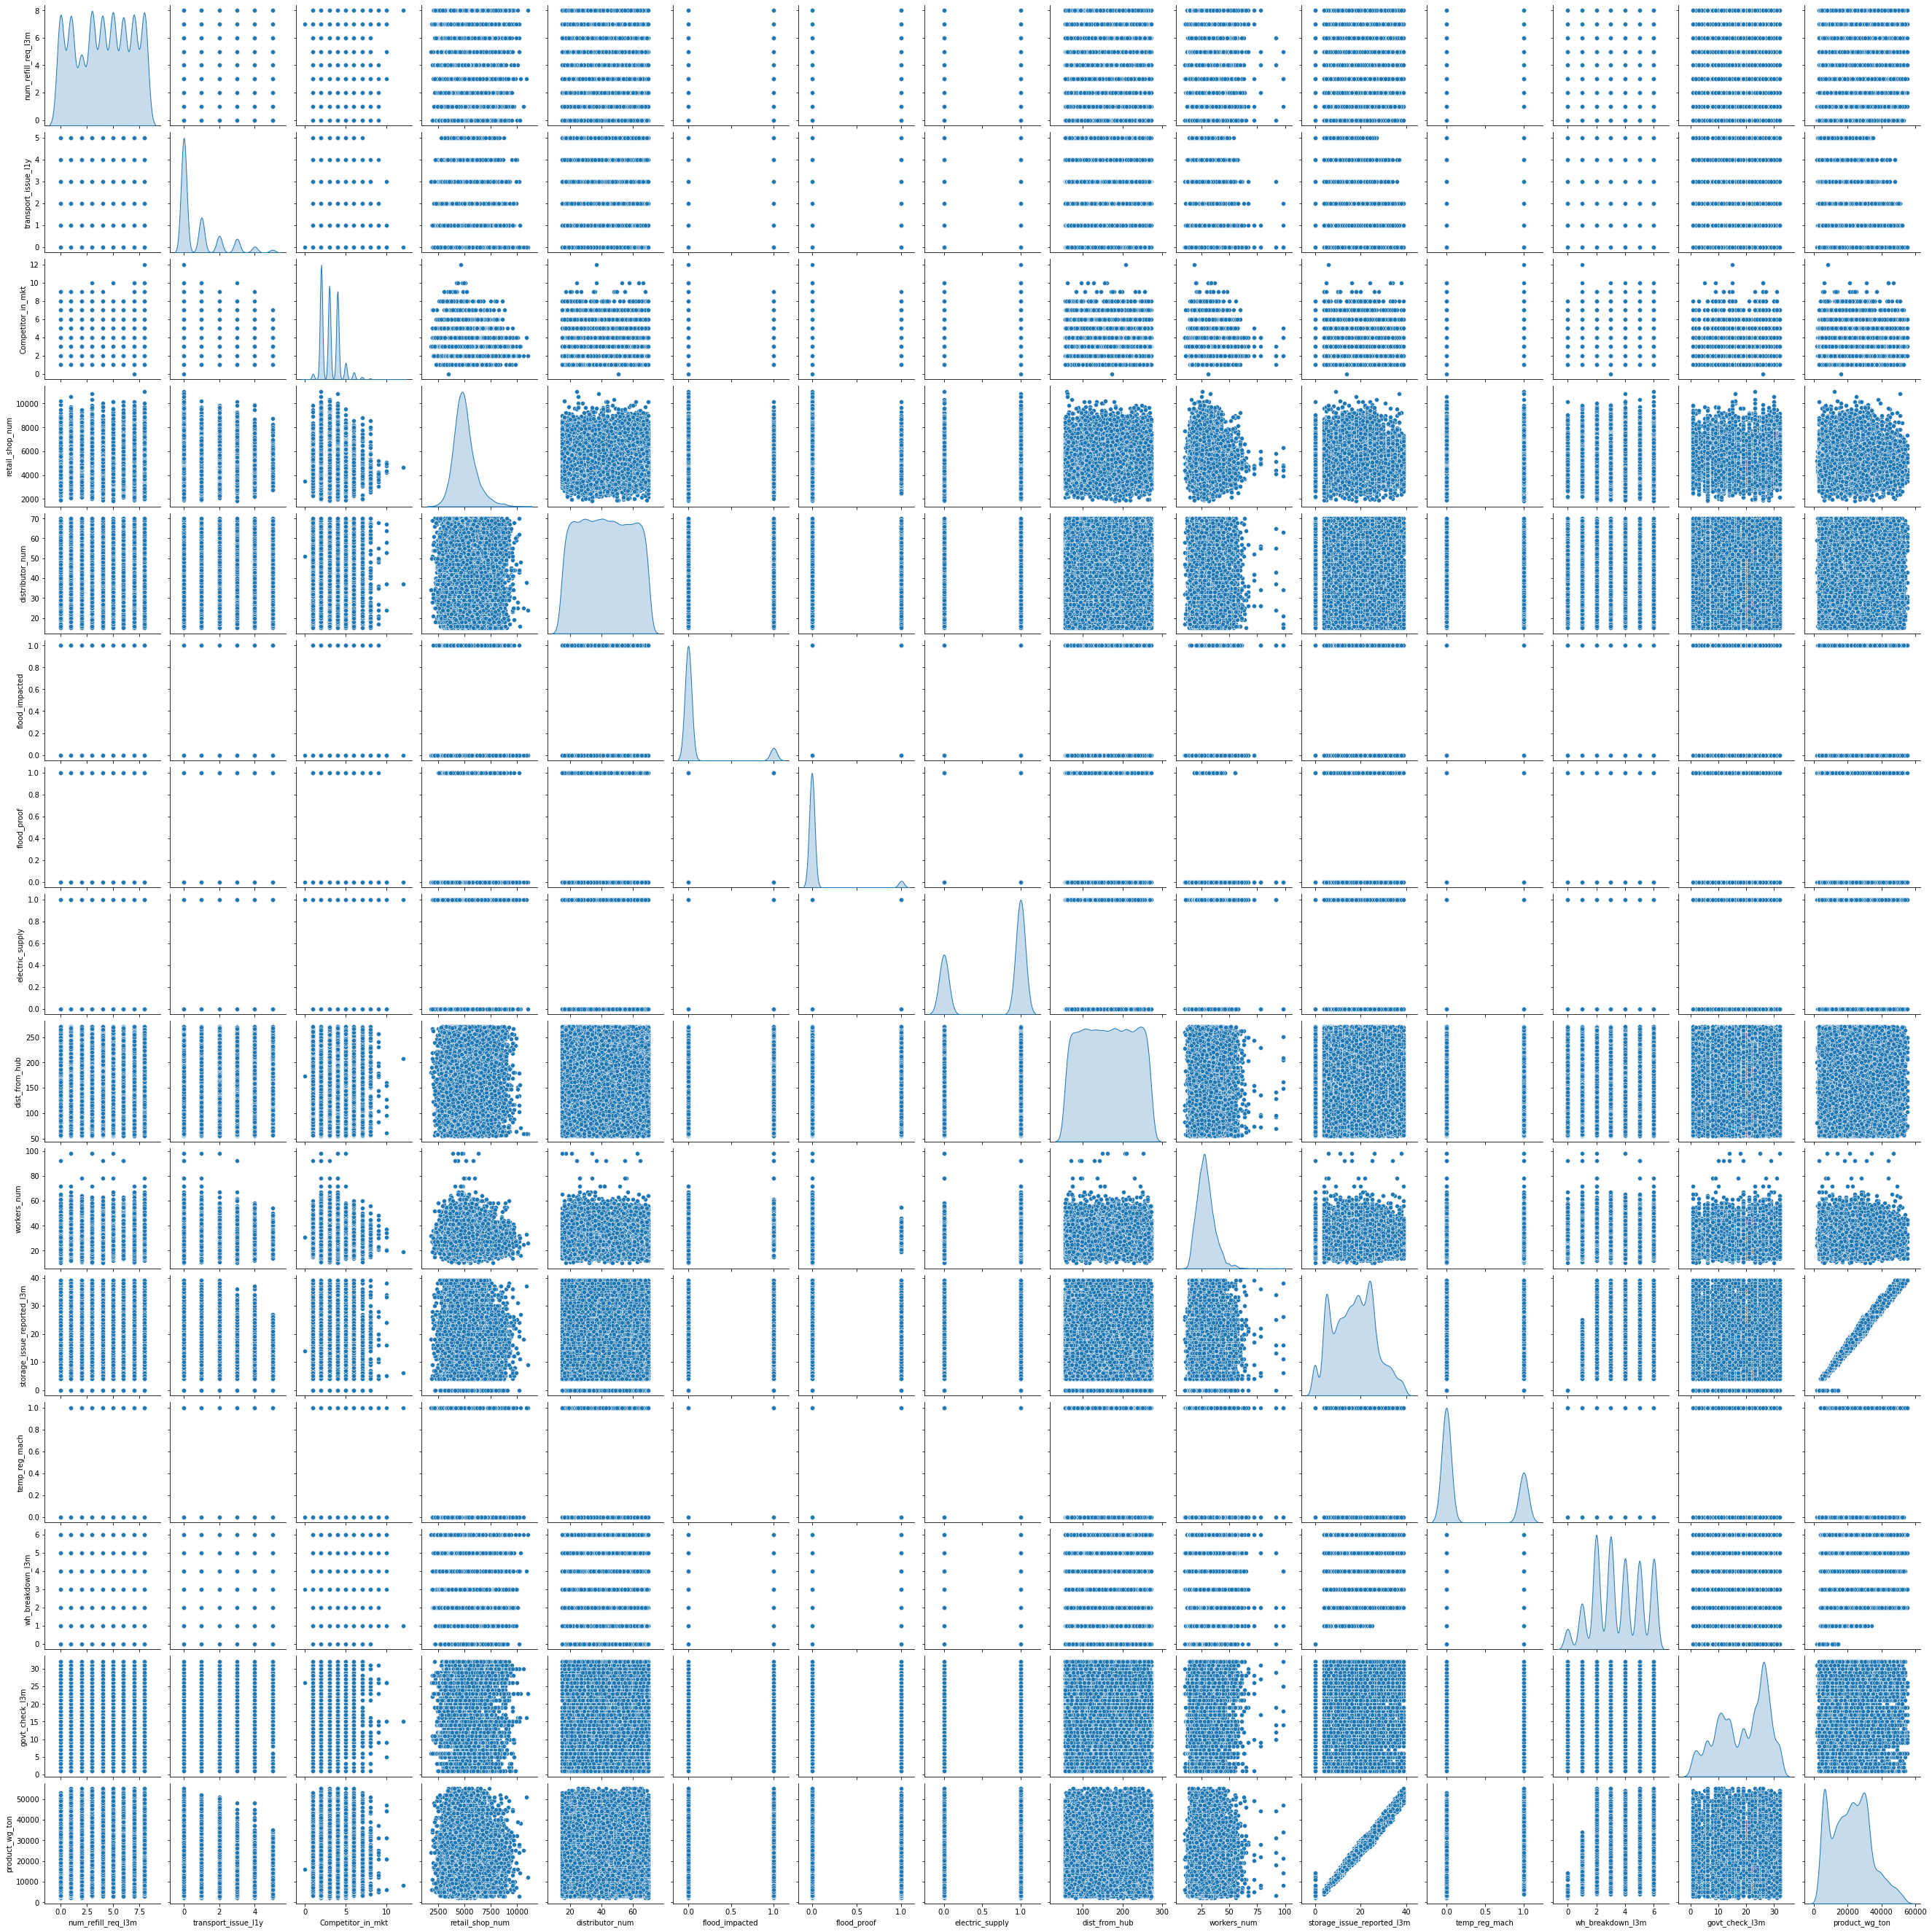

In [37]:
sns.pairplot(df,diag_kind='kde')
plt.show()

#### Heatmap

In [38]:
corr = df.corr()
corr

,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,storage_issue_reported_l3m,temp_reg_mach,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
num_refill_req_l3m,1.000000,0.018549,0.002985,-0.001186,0.003995,-0.010548,-0.001123,-0.007959,0.000048,-0.013764,-0.006602,0.260928,0.000608,-0.003302,0.001415
transport_issue_l1y,0.018549,1.000000,-0.005826,-0.001826,0.008993,-0.009596,0.000022,-0.009299,0.014336,-0.009004,-0.144327,0.018207,0.012990,0.002190,-0.173992
Competitor_in_mkt,0.002985,-0.005826,1.000000,-0.156943,-0.001492,0.009338,-0.003444,0.001759,0.008407,0.000050,0.009543,0.009524,0.012733,-0.043455,0.008884
retail_shop_num,-0.001186,-0.001826,-0.156943,1.000000,-0.000395,-0.003774,0.007223,-0.009207,0.000429,-0.005406,-0.006632,-0.001273,-0.008420,0.045749,-0.006615
distributor_num,0.003995,0.008993,-0.001492,-0.000395,1.000000,0.004611,-0.003409,0.000454,-0.011838,-0.014682,0.003396,0.002827,0.004286,-0.007934,0.004999
flood_impacted,-0.010548,-0.009596,0.009338,-0.003774,0.004611,1.000000,0.107015,0.164815,0.000749,0.168425,-0.003157,-0.008554,-0.001744,0.000587,-0.002299
flood_proof,-0.001123,0.000022,-0.003444,0.007223,-0.003409,0.107015,1.000000,0.114811,-0.005315,0.041228,-0.002712,0.005636,-0.005151,-0.003600,-0.000441
electric_supply,-0.007959,-0.009299,0.001759,-0.009207,0.000454,0.164815,0.114811,1.000000,-0.002701,0.339990,-0.001877,-0.007600,-0.010371,-0.005234,-0.002160
dist_from_hub,0.000048,0.014336,0.008407,0.000429,-0.011838,0.000749,-0.005315,-0.002701,1.000000,-0.018565,-0.005726,0.000902,-0.000906,-0.000531,-0.005017
workers_num,-0.013764,-0.009004,0.000050,-0.005406,-0.014682,0.168425,0.041228,0.339990,-0.018565,1.000000,-0.008673,0.001419,-0.017877,-0.003137,-0.008346


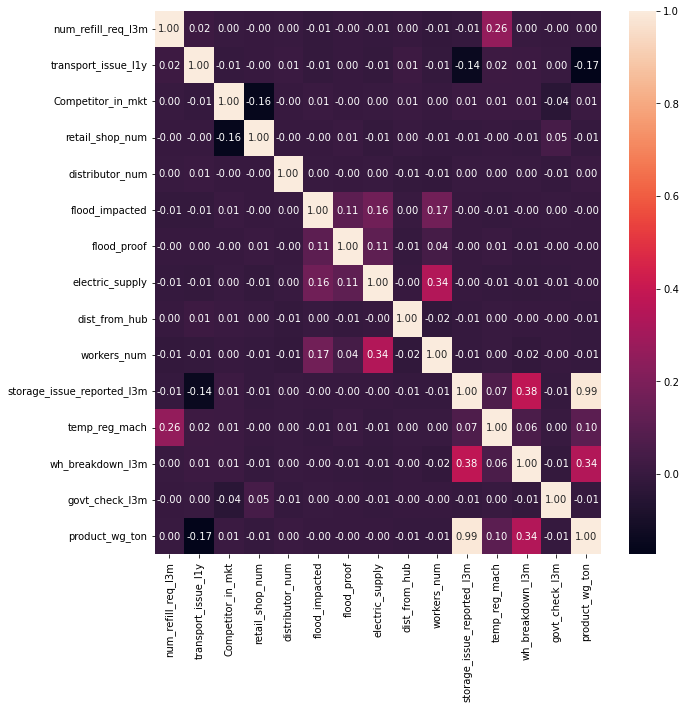

In [39]:
plt.figure(figsize=(10,10))
sns.heatmap(corr, fmt='.2f', annot=True);
plt.show()

#### Missing Value treatment

In [40]:
###Examine missing values
df_na = df.isna().sum()
df_na[df_na.values > 0].sort_values(ascending=False) # Find out all variables that contain missing values

workers_num                     990
approved_wh_govt_certificate    908
dtype: int64

In [41]:
df.isnull().sum()

Location_type                     0
WH_capacity_size                  0
zone                              0
WH_regional_zone                  0
num_refill_req_l3m                0
transport_issue_l1y               0
Competitor_in_mkt                 0
retail_shop_num                   0
wh_owner_type                     0
distributor_num                   0
flood_impacted                    0
flood_proof                       0
electric_supply                   0
dist_from_hub                     0
workers_num                     990
storage_issue_reported_l3m        0
temp_reg_mach                     0
approved_wh_govt_certificate    908
wh_breakdown_l3m                  0
govt_check_l3m                    0
product_wg_ton                    0
dtype: int64

In [42]:
df['workers_num'].fillna(df['workers_num'].median(), inplace = True)

In [43]:
df['approved_wh_govt_certificate'].fillna(df['approved_wh_govt_certificate'].mode()[0], inplace = True)

In [44]:
df.isnull().sum()

Location_type                   0
WH_capacity_size                0
zone                            0
WH_regional_zone                0
num_refill_req_l3m              0
transport_issue_l1y             0
Competitor_in_mkt               0
retail_shop_num                 0
wh_owner_type                   0
distributor_num                 0
flood_impacted                  0
flood_proof                     0
electric_supply                 0
dist_from_hub                   0
workers_num                     0
storage_issue_reported_l3m      0
temp_reg_mach                   0
approved_wh_govt_certificate    0
wh_breakdown_l3m                0
govt_check_l3m                  0
product_wg_ton                  0
dtype: int64

#### Outlier Treatment

In [45]:
df1 = pd.DataFrame(df, columns = ['num_refill_req_l3m','transport_issue_l1y','Competitor_in_mkt','retail_shop_num','distributor_num','dist_from_hub','workers_num','storage_issue_reported_l3m','wh_breakdown_l3m','govt_check_l3m','product_wg_ton'])

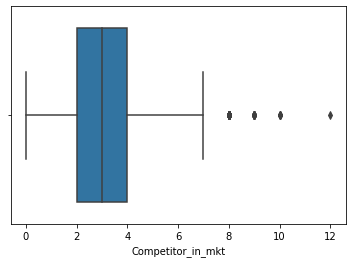

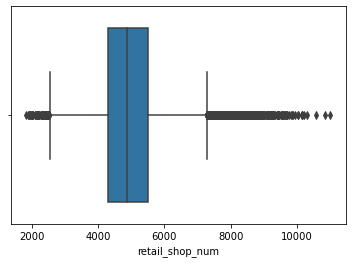

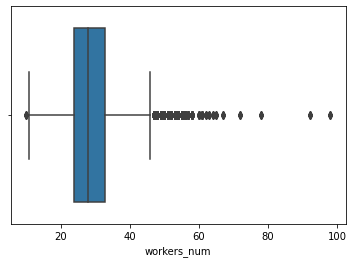

In [46]:
cols = ['Competitor_in_mkt','retail_shop_num','workers_num']

for i in cols:
    sns.boxplot(df1[i])
    plt.show()

In [47]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [48]:
cont=df1.dtypes[(df1.dtypes!='uint8') & (df1.dtypes!='category')].index

In [49]:
for column in df1[cont].columns:
    lr,ur=remove_outlier(df1[column])
    df1[column]=np.where(df1[column]>ur,ur,df1[column])
    df1[column]=np.where(df1[column]<lr,lr,df1[column])

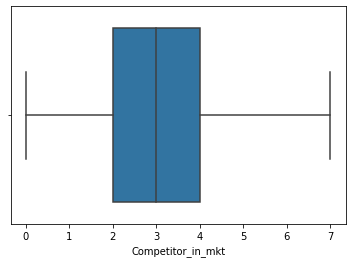

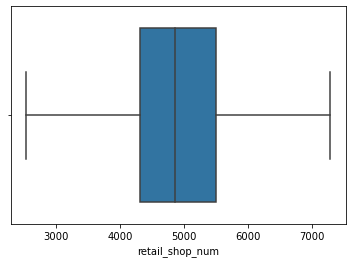

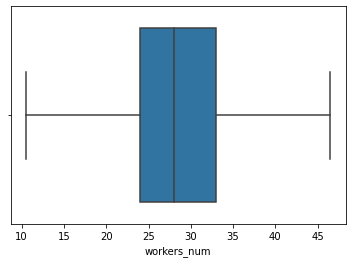

In [50]:
cols = ['Competitor_in_mkt','retail_shop_num','workers_num']

for i in cols:
    sns.boxplot(df1[i])
    plt.show()

#### Skewness

In [51]:
df1.skew(axis = 0, skipna = True)

num_refill_req_l3m           -0.075217
transport_issue_l1y           1.017634
Competitor_in_mkt             0.803838
retail_shop_num               0.435217
distributor_num               0.015213
dist_from_hub                -0.005999
workers_num                   0.453899
storage_issue_reported_l3m    0.113345
wh_breakdown_l3m             -0.068026
govt_check_l3m               -0.363262
product_wg_ton                0.331631
dtype: float64

#### Kurtosis

In [52]:
df1.kurt()

num_refill_req_l3m           -1.220697
transport_issue_l1y          -0.518095
Competitor_in_mkt             0.720011
retail_shop_num               0.073453
distributor_num              -1.187564
dist_from_hub                -1.200682
workers_num                  -0.065361
storage_issue_reported_l3m   -0.680142
wh_breakdown_l3m             -0.952149
govt_check_l3m               -1.057342
product_wg_ton               -0.502022
dtype: float64

#### Encoding

In [53]:
df_en = pd.get_dummies(df, columns=['Location_type', 'WH_capacity_size', 'zone','WH_regional_zone','wh_owner_type','approved_wh_govt_certificate'], drop_first=True)

In [54]:
df_en.head()

,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,storage_issue_reported_l3m,temp_reg_mach,wh_breakdown_l3m,govt_check_l3m,product_wg_ton,Location_type_Urban,WH_capacity_size_Mid,WH_capacity_size_Small,zone_North,zone_South,zone_West,WH_regional_zone_Zone 2,WH_regional_zone_Zone 3,WH_regional_zone_Zone 4,WH_regional_zone_Zone 5,WH_regional_zone_Zone 6,wh_owner_type_Rented,approved_wh_govt_certificate_A+,approved_wh_govt_certificate_B,approved_wh_govt_certificate_B+,approved_wh_govt_certificate_C
0,3,1,2,4651,24,0,1,1,91,29.0,13,0,5,15,17115,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0
1,0,0,4,6217,47,0,0,1,210,31.0,4,0,3,17,5074,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,1,0,4,4306,64,0,0,0,161,37.0,17,0,6,22,23137,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0
3,7,4,2,6000,50,0,0,0,103,21.0,17,1,3,27,22115,0,1,0,1,0,0,0,1,0,0,0,1,1,0,0,0
4,3,1,2,4740,42,1,0,1,112,25.0,18,0,6,24,24071,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1


In [55]:
df_en.columns

Index(['num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt',
       'retail_shop_num', 'distributor_num', 'flood_impacted', 'flood_proof',
       'electric_supply', 'dist_from_hub', 'workers_num',
       'storage_issue_reported_l3m', 'temp_reg_mach', 'wh_breakdown_l3m',
       'govt_check_l3m', 'product_wg_ton', 'Location_type_Urban',
       'WH_capacity_size_Mid', 'WH_capacity_size_Small', 'zone_North',
       'zone_South', 'zone_West', 'WH_regional_zone_Zone 2',
       'WH_regional_zone_Zone 3', 'WH_regional_zone_Zone 4',
       'WH_regional_zone_Zone 5', 'WH_regional_zone_Zone 6',
       'wh_owner_type_Rented', 'approved_wh_govt_certificate_A+',
       'approved_wh_govt_certificate_B', 'approved_wh_govt_certificate_B+',
       'approved_wh_govt_certificate_C'],
      dtype='object')

In [56]:
df_en.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   num_refill_req_l3m               25000 non-null  int64  
 1   transport_issue_l1y              25000 non-null  int64  
 2   Competitor_in_mkt                25000 non-null  int64  
 3   retail_shop_num                  25000 non-null  int64  
 4   distributor_num                  25000 non-null  int64  
 5   flood_impacted                   25000 non-null  int64  
 6   flood_proof                      25000 non-null  int64  
 7   electric_supply                  25000 non-null  int64  
 8   dist_from_hub                    25000 non-null  int64  
 9   workers_num                      25000 non-null  float64
 10  storage_issue_reported_l3m       25000 non-null  int64  
 11  temp_reg_mach                    25000 non-null  int64  
 12  wh_breakdown_l3m  

### Train-test split

In [57]:
# Copy all the independent variables into X dataframe
X = df_en.drop('product_wg_ton', axis=1)

# Copy target into the y dataframe. 
y = df_en[['product_wg_ton']]

In [58]:
X.head()

,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,storage_issue_reported_l3m,temp_reg_mach,wh_breakdown_l3m,govt_check_l3m,Location_type_Urban,WH_capacity_size_Mid,WH_capacity_size_Small,zone_North,zone_South,zone_West,WH_regional_zone_Zone 2,WH_regional_zone_Zone 3,WH_regional_zone_Zone 4,WH_regional_zone_Zone 5,WH_regional_zone_Zone 6,wh_owner_type_Rented,approved_wh_govt_certificate_A+,approved_wh_govt_certificate_B,approved_wh_govt_certificate_B+,approved_wh_govt_certificate_C
0,3,1,2,4651,24,0,1,1,91,29.0,13,0,5,15,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0
1,0,0,4,6217,47,0,0,1,210,31.0,4,0,3,17,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,1,0,4,4306,64,0,0,0,161,37.0,17,0,6,22,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0
3,7,4,2,6000,50,0,0,0,103,21.0,17,1,3,27,0,1,0,1,0,0,0,1,0,0,0,1,1,0,0,0
4,3,1,2,4740,42,1,0,1,112,25.0,18,0,6,24,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1


In [59]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [60]:
X_train.head()

,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,storage_issue_reported_l3m,temp_reg_mach,wh_breakdown_l3m,govt_check_l3m,Location_type_Urban,WH_capacity_size_Mid,WH_capacity_size_Small,zone_North,zone_South,zone_West,WH_regional_zone_Zone 2,WH_regional_zone_Zone 3,WH_regional_zone_Zone 4,WH_regional_zone_Zone 5,WH_regional_zone_Zone 6,wh_owner_type_Rented,approved_wh_govt_certificate_A+,approved_wh_govt_certificate_B,approved_wh_govt_certificate_B+,approved_wh_govt_certificate_C
4289,0,2,4,5031,43,0,0,1,127,32.0,20,0,5,14,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0
19621,6,2,3,9866,59,0,0,1,248,28.0,15,1,3,30,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0
14965,6,0,4,5625,39,0,0,1,63,28.0,31,0,2,11,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0
12321,6,1,3,4240,54,0,0,1,260,31.0,28,0,2,2,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0
6269,4,4,3,7848,23,0,0,1,144,36.0,23,0,6,26,1,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0


In [61]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [62]:
vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])]

In [63]:
i=0
for column in X.columns:
    if i < 31:
        print (column ,"--->",  vif[i], vif[i]<5)
        i = i+1

num_refill_req_l3m ---> 3.7434673352118155 True
transport_issue_l1y ---> 1.4534921245882215 True
Competitor_in_mkt ---> 9.015992983816872 False
retail_shop_num ---> 21.25897559358379 False
distributor_num ---> 7.7045506529087 False
flood_impacted ---> 1.169113138408363 True
flood_proof ---> 1.081609639641163 True
electric_supply ---> 3.4617153660414384 True
dist_from_hub ---> 7.544765963481774 False
workers_num ---> 16.0768647869136 False
storage_issue_reported_l3m ---> 5.524161557948716 False
temp_reg_mach ---> 1.966267567721311 True
wh_breakdown_l3m ---> 6.170338058040448 False
govt_check_l3m ---> 7.042995552288122 False
Location_type_Urban ---> 1.0979266220143995 True
WH_capacity_size_Mid ---> inf False
WH_capacity_size_Small ---> 2.7815398979289747 True
zone_North ---> 16.49090362628583 False
zone_South ---> 10.94281650310854 False
zone_West ---> 12.669046107638696 False
WH_regional_zone_Zone 2 ---> inf False
WH_regional_zone_Zone 3 ---> inf False
WH_regional_zone_Zone 4 ---> inf F

In [64]:
# concatenate X and y into a single dataframe
data_train = pd.concat([X_train, y_train], axis=1)
data_test=pd.concat([X_test,y_test],axis=1)
data_train.head()

,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,storage_issue_reported_l3m,temp_reg_mach,wh_breakdown_l3m,govt_check_l3m,Location_type_Urban,WH_capacity_size_Mid,WH_capacity_size_Small,zone_North,zone_South,zone_West,WH_regional_zone_Zone 2,WH_regional_zone_Zone 3,WH_regional_zone_Zone 4,WH_regional_zone_Zone 5,WH_regional_zone_Zone 6,wh_owner_type_Rented,approved_wh_govt_certificate_A+,approved_wh_govt_certificate_B,approved_wh_govt_certificate_B+,approved_wh_govt_certificate_C,product_wg_ton
4289,0,2,4,5031,43,0,0,1,127,32.0,20,0,5,14,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,23086
19621,6,2,3,9866,59,0,0,1,248,28.0,15,1,3,30,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,19108
14965,6,0,4,5625,39,0,0,1,63,28.0,31,0,2,11,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,38125
12321,6,1,3,4240,54,0,0,1,260,31.0,28,0,2,2,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,33123
6269,4,4,3,7848,23,0,0,1,144,36.0,23,0,6,26,1,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,26089


In [65]:
data_train.rename(columns = {'WH_regional_zone_Zone 2' : 'WH_regional_zone_Zone_2'}, inplace = True)
data_train.rename(columns = {'WH_regional_zone_Zone 3' : 'WH_regional_zone_Zone_3'}, inplace = True)
data_train.rename(columns = {'WH_regional_zone_Zone 4' : 'WH_regional_zone_Zone_4'}, inplace = True)
data_train.rename(columns = {'WH_regional_zone_Zone 5' : 'WH_regional_zone_Zone_5'}, inplace = True)
data_train.rename(columns = {'WH_regional_zone_Zone 6' : 'WH_regional_zone_Zone_6'}, inplace = True)
data_train.rename(columns = {'approved_wh_govt_certificate_A+' : 'approved_wh_govt_certificate_Aplus'}, inplace = True)
data_train.rename(columns = {'approved_wh_govt_certificate_B+' : 'approved_wh_govt_certificate_Bplus'}, inplace = True)
data_test.rename(columns = {'WH_regional_zone_Zone 2' : 'WH_regional_zone_Zone_2'}, inplace = True)
data_test.rename(columns = {'WH_regional_zone_Zone 3' : 'WH_regional_zone_Zone_3'}, inplace = True)
data_test.rename(columns = {'WH_regional_zone_Zone 4' : 'WH_regional_zone_Zone_4'}, inplace = True)
data_test.rename(columns = {'WH_regional_zone_Zone 5' : 'WH_regional_zone_Zone_5'}, inplace = True)
data_test.rename(columns = {'WH_regional_zone_Zone 6' : 'WH_regional_zone_Zone_6'}, inplace = True)
data_test.rename(columns = {'approved_wh_govt_certificate_A+' : 'approved_wh_govt_certificate_Aplus'}, inplace = True)
data_test.rename(columns = {'approved_wh_govt_certificate_B+' : 'approved_wh_govt_certificate_Bplus'}, inplace = True)

In [66]:
data_train.columns

Index(['num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt',
       'retail_shop_num', 'distributor_num', 'flood_impacted', 'flood_proof',
       'electric_supply', 'dist_from_hub', 'workers_num',
       'storage_issue_reported_l3m', 'temp_reg_mach', 'wh_breakdown_l3m',
       'govt_check_l3m', 'Location_type_Urban', 'WH_capacity_size_Mid',
       'WH_capacity_size_Small', 'zone_North', 'zone_South', 'zone_West',
       'WH_regional_zone_Zone_2', 'WH_regional_zone_Zone_3',
       'WH_regional_zone_Zone_4', 'WH_regional_zone_Zone_5',
       'WH_regional_zone_Zone_6', 'wh_owner_type_Rented',
       'approved_wh_govt_certificate_Aplus', 'approved_wh_govt_certificate_B',
       'approved_wh_govt_certificate_Bplus', 'approved_wh_govt_certificate_C',
       'product_wg_ton'],
      dtype='object')

In [67]:
expr = 'product_wg_ton ~ num_refill_req_l3m + transport_issue_l1y + Competitor_in_mkt + retail_shop_num + distributor_num + flood_impacted + flood_proof + electric_supply + dist_from_hub + workers_num + storage_issue_reported_l3m + temp_reg_mach + wh_breakdown_l3m + govt_check_l3m + Location_type_Urban + WH_capacity_size_Mid + WH_capacity_size_Small + zone_North + zone_South + zone_West + WH_regional_zone_Zone_2 + WH_regional_zone_Zone_3 + WH_regional_zone_Zone_4 + WH_regional_zone_Zone_5 + WH_regional_zone_Zone_6 + wh_owner_type_Rented + approved_wh_govt_certificate_Aplus + approved_wh_govt_certificate_B + approved_wh_govt_certificate_Bplus + approved_wh_govt_certificate_C'

In [68]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula = expr , data = data_train).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         product_wg_ton   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                 4.048e+04
Date:                Sun, 07 Aug 2022   Prob (F-statistic):               0.00
Time:                        22:32:04   Log-Likelihood:            -1.5173e+05
No. Observations:               17500   AIC:                         3.035e+05
Df Residuals:                   17470   BIC:                         3.038e+05
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                           1720.0915    152.585     11.273      0.000    1421.010    2019.173
num_refill_req_l3m                    24.0493      4.280      5.619      0.000      15.660      32.438
transport_issue_l1y                 -291.4161      9.015    -32.325      0.000    -309.087    -273.746
Competitor_in_mkt                    -15.9308     10.644     -1.497      0.134     -36.794       4.932
retail_shop_num                        0.0004      0.010      0.037      0.970      -0.020       0.021
distributor_num                        0.6987      0.665      1.051      0.293      -0.604       2.001
flood_impacted                        13.0998     37.217      0.352      0.725     -59.849      86.048
flood_proof                           11.6845     47.973      0.244      0.808     -82.348     105.717
electric_supply                       -4.1190     24.533     -0.168      0.867     -52.207      43.969
dist_from_hub                          0.2512      0.170      1.476      0.140      -0.082       0.585
workers_num                            0.8708      1.488      0.585      0.559      -2.047       3.788
storage_issue_reported_l3m          1263.3326      1.296    974.656      0.000    1260.792    1265.873
temp_reg_mach                        401.3262     27.091     14.814      0.000     348.225     454.427
wh_breakdown_l3m                    -192.8264      6.891    -27.982      0.000    -206.334    -179.319
govt_check_l3m                         0.8122      1.434      0.566      0.571      -1.998       3.623
Location_type_Urban                 -109.0314     39.239     -2.779      0.005    -185.943     -32.119
WH_capacity_size_Mid                 -14.6595     44.689     -0.328      0.743    -102.255      72.936
WH_capacity_size_Small                31.3410     43.207      0.725      0.468     -53.350     116.032
zone_North                            71.0625     86.811      0.819      0.413     -99.095     241.220
zone_South                            51.9359     88.985      0.584      0.559    -122.484     226.356
zone_West                             98.4064     85.604      1.150      0.250     -69.385     266.198
WH_regional_zone_Zone_2                8.8821     30.527      0.291      0.771     -50.954      68.718
WH_regional_zone_Zone_3              -30.7805     29.174     -1.055      0.291     -87.964      26.403
WH_regional_zone_Zone_4                7.2388     26.692      0.271      0.786     -45.081      59.558
WH_regional_zone_Zone_5              -48.1476     63.669     -0.756      0.450    -172.945      76.650
WH_regional_zone_Zone_6              -30.4615     51.439     -0.592      0.554    -131.288      70.365
wh_owner_type_Rented                  38.4694     22.236      1.730      0.084      -5.115      

In [69]:
expr1 = 'product_wg_ton ~ num_refill_req_l3m + transport_issue_l1y + storage_issue_reported_l3m + temp_reg_mach + wh_breakdown_l3m + Location_type_Urban + approved_wh_govt_certificate_Aplus + approved_wh_govt_certificate_B + approved_wh_govt_certificate_Bplus + approved_wh_govt_certificate_C'

In [70]:
lm2 = smf.ols(formula = expr1 , data = data_train).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         product_wg_ton   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                 1.174e+05
Date:                Sun, 07 Aug 2022   Prob (F-statistic):               0.00
Time:                        22:32:05   Log-Likelihood:            -1.5174e+05
No. Observations:               17500   AIC:                         3.035e+05
Df Residuals:                   17489   BIC:                         3.036e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                           1854.7861     41.823     44.349      0.000    1772.809    1936.763
num_refill_req_l3m                    23.9955      4.277      5.610      0.000      15.611      32.380
transport_issue_l1y                 -291.2405      9.010    -32.323      0.000    -308.902    -273.579
storage_issue_reported_l3m          1263.2882      1.296    975.094      0.000    1260.749    1265.828
temp_reg_mach                        401.3853     27.074     14.825      0.000     348.317     454.454
wh_breakdown_l3m                    -192.8254      6.886    -28.004      0.000    -206.322    -179.329
Location_type_Urban                 -111.4445     39.200     -2.843      0.004    -188.280     -34.609
approved_wh_govt_certificate_Aplus   321.8549     38.886      8.277      0.000     245.635     398.075
approved_wh_govt_certificate_B     -2070.0152     34.456    -60.078      0.000   -2137.552   -2002.479
approved_wh_govt_certificate_Bplus -2096.8679     34.472    -60.828      0.000   -2164.436   -2029.299
approved_wh_govt_certificate_C       239.6382     33.103      7.239      0.000     174.753     304.523
==============================================================================
Omnibus:                     8454.925   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           104188.077
Skew:                           2.014   Prob(JB):                         0.00
Kurtosis:                      14.255   Cond. No.                         117.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [200]:
# Calculate MSE
mse=np.mean((lm2.predict(data_train.drop('product_wg_ton', axis=1)) - data_train['product_wg_ton'])**2)
mse

1990472.6301014281

In [72]:
#Root Mean Squared Error - RMSE
np.sqrt(mse)

1410.8411073191155

In [73]:
np.sqrt(lm2.mse_resid) #another way

1411.2847236686557

In [74]:
# Prediction on Test data
y_pred = lm2.predict(data_test)

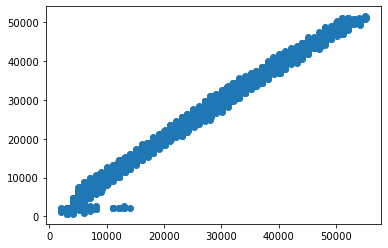

In [75]:
plt.scatter(y_test['product_wg_ton'], y_pred)
plt.show()

In [76]:
for i,j in np.array(lm2.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(1854.79) * Intercept + (24.0) * num_refill_req_l3m + (-291.24) * transport_issue_l1y + (1263.29) * storage_issue_reported_l3m + (401.39) * temp_reg_mach + (-192.83) * wh_breakdown_l3m + (-111.44) * Location_type_Urban + (321.85) * approved_wh_govt_certificate_Aplus + (-2070.02) * approved_wh_govt_certificate_B + (-2096.87) * approved_wh_govt_certificate_Bplus + (239.64) * approved_wh_govt_certificate_C + 

#### Linear Regression

In [77]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn import metrics,model_selection
from sklearn.preprocessing import scale

In [78]:
# invoke the LinearRegression function and find the bestfit model on training data
LR = LinearRegression()
LR.fit(X_train, y_train)

LinearRegression()

In [79]:
# Let us explore the coefficients for each of the independent attributes
for idx, col_name in enumerate(X_train.columns):
    print('The coefficient for {} is {}'.format(col_name,LR.coef_[0][idx]))

The coefficient for num_refill_req_l3m is 24.04932026104398
The coefficient for transport_issue_l1y is -291.41609895028137
The coefficient for Competitor_in_mkt is -15.930762030543907
The coefficient for retail_shop_num is 0.0003857232424403256
The coefficient for distributor_num is 0.6986857532862891
The coefficient for flood_impacted is 13.099846309050639
The coefficient for flood_proof is 11.684456001256747
The coefficient for electric_supply is -4.1189658619496825
The coefficient for dist_from_hub is 0.251205728818674
The coefficient for workers_num is 0.8707741081235261
The coefficient for storage_issue_reported_l3m is 1263.332610250632
The coefficient for temp_reg_mach is 401.3261731010325
The coefficient for wh_breakdown_l3m is -192.82635583894992
The coefficient for govt_check_l3m is 0.8121988437930914
The coefficient for Location_type_Urban is -109.03136046096739
The coefficient for WH_capacity_size_Mid is -14.6595305296391
The coefficient for WH_capacity_size_Small is 31.3409

In [80]:
# Let us check the intercept for the model

intercept = LR.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 1720.091537565033


In [81]:
# R square on training data
LR.score(X_train,y_train)

0.9853347512307657

In [82]:
# R square on testing data
LR.score(X_test,y_test)

0.9863854306782988

In [83]:
#RMSE on Training data
predicted_train_LR = LR.fit(X_train, y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train, predicted_train_LR))

1410.1923061848574

In [84]:
#RMSE on Testing data
predicted_test_LR=LR.fit(X_test, y_test).predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test, predicted_test_LR))

1340.3592335531564

In [85]:
from sklearn.metrics import mean_squared_error
#MSE on Training data
predicted_mse_train_LR = LR.fit(X_train, y_train).predict(X_train)
mean_squared_error(y_train, predicted_mse_train_LR)

1988642.340422967

In [86]:
#MSE on Testing data
predicted_mse_test_LR = LR.fit(X_test, y_test).predict(X_test)
mean_squared_error(y_test, predicted_mse_test_LR)

1796562.8749712051

In [87]:
from sklearn.metrics import mean_absolute_error
#MAE on Training data
predicted_mae_train_LR = LR.fit(X_train, y_train).predict(X_train)
mean_absolute_error(y_train, predicted_mae_train_LR)

1017.2116717855481

In [88]:
#MAE on Testing data
predicted_mae_test_LR = LR.fit(X_test, y_test).predict(X_test)
mean_absolute_error(y_test, predicted_mae_test_LR)

992.3159841122249

#### Finding ideal alpha value for ridge regression

In [157]:
from sklearn.linear_model import RidgeCV

In [185]:
# Standarize features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_std = scaler.fit_transform(X_train)

In [186]:
# Create ridge regression with three possible alpha values
regr_cv = RidgeCV(alphas=[0.1, 0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9, 1.0])

In [187]:
# Fit the linear regression
model_cv = regr_cv.fit(X_std, y_train)

In [188]:
# View alpha
model_cv.alpha_

0.8

#### Ridge Regression

In [168]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.8)
ridge.fit(X_train,y_train)
#print ("Ridge model:", (ridge.coef_))

Ridge(alpha=0.8)

In [169]:
for idx, col_name in enumerate(X_train.columns):
    print('The coefficient for {} is {}'.format(col_name,ridge.coef_[0][idx]))

The coefficient for num_refill_req_l3m is 24.05049829513617
The coefficient for transport_issue_l1y is -291.40569610431373
The coefficient for Competitor_in_mkt is -15.946175837928406
The coefficient for retail_shop_num is 0.0003837142047024768
The coefficient for distributor_num is 0.6989043367885046
The coefficient for flood_impacted is 13.104968346913118
The coefficient for flood_proof is 11.703656717988572
The coefficient for electric_supply is -4.1136562252833535
The coefficient for dist_from_hub is 0.2512494994176893
The coefficient for workers_num is 0.8698060643134424
The coefficient for storage_issue_reported_l3m is 1263.3323850905188
The coefficient for temp_reg_mach is 401.27250514133243
The coefficient for wh_breakdown_l3m is -192.82025512010313
The coefficient for govt_check_l3m is 0.8118764248272039
The coefficient for Location_type_Urban is -108.96513430405847
The coefficient for WH_capacity_size_Mid is -14.639471323815544
The coefficient for WH_capacity_size_Small is 31

In [170]:
# Let us check the intercept for the model

intercept = ridge.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 1719.8689482218288


In [171]:
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

0.985334749414078
0.9863855111855535


In [172]:
#RMSE on Training data
predicted_train1=ridge.fit(X_train, y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train, predicted_train1))

1410.1923935300886

In [173]:
#RMSE on Testing data
predicted_test1=ridge.fit(X_test, y_test).predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test, predicted_test1))

1340.3597744272547

In [174]:
#MSE on Training data
predicted_mse_train1 = ridge.fit(X_train, y_train).predict(X_train)
mean_squared_error(y_train, predicted_mse_train1)

1988642.5867701203

In [175]:
#MSE on Testing data
predicted_mse_test1 = ridge.fit(X_test, y_test).predict(X_test)
mean_squared_error(y_test, predicted_mse_test1)

1796564.3249026814

In [176]:
#MAE on Training data
predicted_mae_train1 = ridge.fit(X_train, y_train).predict(X_train)
mean_absolute_error(y_train, predicted_mae_train1)

1017.1779302024912

In [177]:
#MAE on Testing data
predicted_mae_test1 = ridge.fit(X_test, y_test).predict(X_test)
mean_absolute_error(y_test, predicted_mae_test1)

992.232541757897

#### Finding ideal alpha value for lasso regression

In [178]:
from sklearn.linear_model import LassoCV

In [180]:
# Create lasso regression with three possible alpha values
regr_cv1 = LassoCV(alphas=[0.1, 0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9, 1.0])

In [182]:
# Fit the linear regression
model_cv1 = regr_cv1.fit(X_std, y)

In [183]:
# View alpha
model_cv1.alpha_

1.0

#### Lasso Regression

In [190]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0)
lasso.fit(X_train,y_train)
#print ("Lasso model:", (lasso.coef_))

Lasso()

In [191]:
for idx, col_name in enumerate(X_train.columns):
    print('The coefficient for {} is {}'.format(col_name,lasso.coef_[idx]))

The coefficient for num_refill_req_l3m is 23.96342382480968
The coefficient for transport_issue_l1y is -290.8703686561886
The coefficient for Competitor_in_mkt is -16.046725589586785
The coefficient for retail_shop_num is 0.001132471074681798
The coefficient for distributor_num is 0.7024371802373341
The coefficient for flood_impacted is 1.4832840409484735
The coefficient for flood_proof is 0.0
The coefficient for electric_supply is -0.0
The coefficient for dist_from_hub is 0.2508563775888071
The coefficient for workers_num is 0.7846231074985331
The coefficient for storage_issue_reported_l3m is 1263.2594953792152
The coefficient for temp_reg_mach is 398.77221120800556
The coefficient for wh_breakdown_l3m is -192.6217378431249
The coefficient for govt_check_l3m is 0.7257321628476935
The coefficient for Location_type_Urban is -95.61625926748974
The coefficient for WH_capacity_size_Mid is 0.0
The coefficient for WH_capacity_size_Small is 27.291857271985087
The coefficient for zone_North is

In [192]:
# Let us check the intercept for the model

intercept = lasso.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 1770.3873126080252


In [193]:
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

0.985333346266875
0.9863906242416831


In [194]:
#RMSE on Training data
predicted_train2=lasso.fit(X_train, y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train, predicted_train2))

1410.2598543679887

In [195]:
#RMSE on Testing data
predicted_test2=lasso.fit(X_test, y_test).predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test, predicted_test2))

1340.5358478718188

In [196]:
#MSE on Training data
predicted_mse_train2 = lasso.fit(X_train, y_train).predict(X_train)
mean_squared_error(y_train, predicted_mse_train2)

1988832.856842021

In [197]:
#MSE on Testing data
predicted_mse_test2 = lasso.fit(X_test, y_test).predict(X_test)
mean_squared_error(y_test, predicted_mse_test2)

1797036.3594294158

In [198]:
#MAE on Training data
predicted_mae_train2 = lasso.fit(X_train, y_train).predict(X_train)
mean_absolute_error(y_train, predicted_mae_train2)

1016.5142366052246

In [199]:
#MAE on Testing data
predicted_mae_test2 = lasso.fit(X_test, y_test).predict(X_test)
mean_absolute_error(y_test, predicted_mae_test2)

991.7767284508216

#### Label Encoding

In [109]:
df["Location_type"] = df["Location_type"].cat.codes
df["WH_capacity_size"] = df["WH_capacity_size"].cat.codes
df["zone"] = df["zone"].cat.codes
df["WH_regional_zone"] = df["WH_regional_zone"].cat.codes
df["wh_owner_type"] = df["wh_owner_type"].cat.codes
df["approved_wh_govt_certificate"] = df["approved_wh_govt_certificate"].cat.codes

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Location_type                 25000 non-null  int8   
 1   WH_capacity_size              25000 non-null  int8   
 2   zone                          25000 non-null  int8   
 3   WH_regional_zone              25000 non-null  int8   
 4   num_refill_req_l3m            25000 non-null  int64  
 5   transport_issue_l1y           25000 non-null  int64  
 6   Competitor_in_mkt             25000 non-null  int64  
 7   retail_shop_num               25000 non-null  int64  
 8   wh_owner_type                 25000 non-null  int8   
 9   distributor_num               25000 non-null  int64  
 10  flood_impacted                25000 non-null  int64  
 11  flood_proof                   25000 non-null  int64  
 12  electric_supply               25000 non-null  int64  
 13  d

In [111]:
# Copy all the independent variables into X dataframe
x = df.drop('product_wg_ton', axis=1)

# Copy target into the y dataframe. 
Y = df[['product_wg_ton']]

In [112]:
# Split x and Y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size=0.30 , random_state=1)

#### Model building

In [113]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV

In [114]:
dTree1 = DecisionTreeRegressor(random_state =9, max_depth=15, min_samples_split= 75, min_samples_leaf = 15)
rf = RandomForestRegressor(n_estimators=100, random_state = 1)
grad = GradientBoostingRegressor(random_state= 5 , n_estimators=100)

#### Decision Tree

In [115]:
# Fit the model
dTree1.fit(x_train, Y_train)

DecisionTreeRegressor(max_depth=15, min_samples_leaf=15, min_samples_split=75,
                      random_state=9)

In [116]:
dTree1.score(x_train , Y_train)

0.9938283453250752

In [117]:
dTree1.score(x_test , Y_test)

0.9929968025023141

In [118]:
Y_predict1 = dTree1.predict(x_train)
Y_predict_test1 = dTree1.predict(x_test)

In [119]:
#RMSE 
display(np.sqrt(metrics.mean_squared_error(Y_train, Y_predict1)))
display(np.sqrt(metrics.mean_squared_error(Y_test, Y_predict_test1)))

914.8174341912326

964.0311162811925

In [120]:
#MSE 
display(mean_squared_error(Y_train, Y_predict1))
display(mean_squared_error(Y_test, Y_predict_test1))

836890.93790023

929355.9931583621

In [121]:
#MAE
display(mean_absolute_error(Y_train, Y_predict1))
display(mean_absolute_error(Y_test, Y_predict_test1))

677.5985394659879

723.1074882470047

In [122]:
print (pd.DataFrame(dTree1.feature_importances_, columns = ["Imp"], index = x_train.columns).sort_values('Imp',ascending=False))

                                       Imp
storage_issue_reported_l3m    9.885832e-01
approved_wh_govt_certificate  9.222925e-03
transport_issue_l1y           9.054073e-04
temp_reg_mach                 6.467033e-04
num_refill_req_l3m            2.068278e-04
retail_shop_num               9.399740e-05
distributor_num               8.446837e-05
govt_check_l3m                5.036160e-05
WH_regional_zone              4.918414e-05
dist_from_hub                 3.922702e-05
wh_breakdown_l3m              3.089001e-05
electric_supply               2.951810e-05
zone                          1.820732e-05
workers_num                   1.785265e-05
wh_owner_type                 8.181905e-06
WH_capacity_size              7.494362e-06
Location_type                 4.840821e-06
Competitor_in_mkt             6.902916e-07
flood_proof                   0.000000e+00
flood_impacted                0.000000e+00


#### Random Forest 

In [123]:
rf.fit(x_train , Y_train)

RandomForestRegressor(random_state=1)

In [124]:
rf.score(x_train , Y_train)

0.9990244179545811

In [125]:
rf.score(x_test , Y_test)

0.993352679500361

In [126]:
Y_predict2 = rf.predict(x_train)
Y_predict_test2 = rf.predict(x_test)

In [127]:
#RMSE 
display(np.sqrt(metrics.mean_squared_error(Y_train, Y_predict2)))
display(np.sqrt(metrics.mean_squared_error(Y_test, Y_predict_test2)))

363.71861040462113

939.2174963182206

In [128]:
#MSE 
display(mean_squared_error(Y_train, Y_predict2))
display(mean_squared_error(Y_test, Y_predict_test2))

132291.22755466856

882129.5053902667

In [129]:
#MAE 
display(mean_absolute_error(Y_train, Y_predict2))
display(mean_absolute_error(Y_test, Y_predict_test2))

266.0954794285714

704.1425973333334

In [130]:
print (pd.DataFrame(rf.feature_importances_, columns = ["Imp"], index = x_train.columns).sort_values('Imp',ascending=False))

                                   Imp
storage_issue_reported_l3m    0.982629
approved_wh_govt_certificate  0.009096
transport_issue_l1y           0.001109
retail_shop_num               0.000897
dist_from_hub                 0.000872
distributor_num               0.000818
temp_reg_mach                 0.000804
workers_num                   0.000722
govt_check_l3m                0.000642
num_refill_req_l3m            0.000632
wh_breakdown_l3m              0.000442
WH_regional_zone              0.000281
Competitor_in_mkt             0.000279
zone                          0.000222
WH_capacity_size              0.000137
wh_owner_type                 0.000128
electric_supply               0.000102
flood_impacted                0.000088
Location_type                 0.000050
flood_proof                   0.000048


#### Gradient Boosting

In [131]:
# Fit the model
grad.fit(x_train, Y_train)

GradientBoostingRegressor(random_state=5)

In [132]:
grad.score(x_train , Y_train)

0.9935229227306382

In [133]:
grad.score(x_test , Y_test)

0.9938793380881912

In [134]:
Y_predict3 = grad.predict(x_train)
Y_predict_test3 = grad.predict(x_test)

In [135]:
#RMSE 
display(np.sqrt(metrics.mean_squared_error(Y_train, Y_predict3)))
display(np.sqrt(metrics.mean_squared_error(Y_test, Y_predict_test3)))

937.1803254697362

901.2433234010364

In [136]:
#MSE 
display(mean_squared_error(Y_train, Y_predict3))
display(mean_squared_error(Y_test, Y_predict_test3))

878306.9624475606

812239.527974945

In [137]:
#MAE 
display(mean_absolute_error(Y_train, Y_predict3))
display(mean_absolute_error(Y_test, Y_predict_test3))

695.7334018061597

686.2413182019877

In [138]:
print (pd.DataFrame(grad.feature_importances_, columns = ["Imp"], index = x_train.columns).sort_values('Imp',ascending=False))

                                       Imp
storage_issue_reported_l3m    9.887962e-01
approved_wh_govt_certificate  8.751900e-03
temp_reg_mach                 1.121109e-03
transport_issue_l1y           9.616866e-04
num_refill_req_l3m            1.874895e-04
wh_breakdown_l3m              1.468607e-04
workers_num                   8.975528e-06
retail_shop_num               6.154947e-06
Competitor_in_mkt             5.467864e-06
govt_check_l3m                4.574865e-06
dist_from_hub                 3.775723e-06
distributor_num               3.595646e-06
zone                          1.650812e-06
flood_proof                   5.136182e-07
Location_type                 0.000000e+00
electric_supply               0.000000e+00
WH_capacity_size              0.000000e+00
wh_owner_type                 0.000000e+00
WH_regional_zone              0.000000e+00
flood_impacted                0.000000e+00


#### Bagging Regressor

In [139]:
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor

In [140]:
bgg = BaggingRegressor(n_estimators = 100, random_state=5)

In [141]:
bgg.fit(x_train, Y_train)

BaggingRegressor(n_estimators=100, random_state=5)

In [142]:
bgg.score(x_train, Y_train)

0.9990334904724388

In [143]:
bgg.score(x_test , Y_test)

0.9932865466416534

In [144]:
Y_predict4 = grad.predict(x_train)
Y_predict_test4 = grad.predict(x_test)

In [145]:
#RMSE 
display(np.sqrt(metrics.mean_squared_error(Y_train, Y_predict4)))
display(np.sqrt(metrics.mean_squared_error(Y_test, Y_predict_test4)))

937.1803254697362

901.2433234010364

In [146]:
#MSE 
display(mean_squared_error(Y_train, Y_predict4))
display(mean_squared_error(Y_test, Y_predict_test4))

878306.9624475606

812239.527974945

In [147]:
#MAE 
display(mean_absolute_error(Y_train, Y_predict4))
display(mean_absolute_error(Y_test, Y_predict_test4))

695.7334018061597

686.2413182019877

#### Ada Boosting

In [148]:
ada = AdaBoostRegressor(n_estimators = 100, random_state=5)

In [149]:
ada.fit(x_train, Y_train)

AdaBoostRegressor(n_estimators=100, random_state=5)

In [150]:
ada.score(x_train, Y_train)

0.9779445946228448

In [151]:
ada.score(x_test , Y_test)

0.9778359540837656

In [152]:
Y_predict5 = grad.predict(x_train)
Y_predict_test5 = grad.predict(x_test)

In [153]:
#RMSE 
display(np.sqrt(metrics.mean_squared_error(Y_train, Y_predict5)))
display(np.sqrt(metrics.mean_squared_error(Y_test, Y_predict_test5)))

937.1803254697362

901.2433234010364

In [154]:
#MSE 
display(mean_squared_error(Y_train, Y_predict5))
display(mean_squared_error(Y_test, Y_predict_test5))

878306.9624475606

812239.527974945

In [155]:
#MAE 
display(mean_absolute_error(Y_train, Y_predict5))
display(mean_absolute_error(Y_test, Y_predict_test5))

695.7334018061597

686.2413182019877

In [156]:
print (pd.DataFrame(ada.feature_importances_, columns = ["Imp"], index = x_train.columns).sort_values('Imp',ascending=False))

                                   Imp
storage_issue_reported_l3m    0.996867
num_refill_req_l3m            0.001596
transport_issue_l1y           0.001486
retail_shop_num               0.000051
Location_type                 0.000000
electric_supply               0.000000
wh_breakdown_l3m              0.000000
approved_wh_govt_certificate  0.000000
temp_reg_mach                 0.000000
workers_num                   0.000000
dist_from_hub                 0.000000
flood_impacted                0.000000
flood_proof                   0.000000
WH_capacity_size              0.000000
distributor_num               0.000000
wh_owner_type                 0.000000
Competitor_in_mkt             0.000000
WH_regional_zone              0.000000
zone                          0.000000
govt_check_l3m                0.000000
